Réalisé par: \
***Maryeme BAYRI (AMSD)*** \
***Imane JELTI (AMSD)*** \
***Mouad ET-TALI (AMSD)***



# 1.  Données Crédits bancaires

## Importations

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from collections import Counter

## ***Une étude exploratoire préliminaire***




### ***Lecture et pré-traitement des données***

In [ ]:
credit_df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/german.csv', header = None)
credit_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201,2


Nous pouvons voir que les colonnes catégorielles sont encodées avec un format Axxx, où "x" sont des entiers pour les différents labels.

Nous pouvons également constater que les variables numériques ont des échelles différentes. Cela suggère que la mise à l'échelle des colonnes de nombres entiers sera nécessaire pour les algorithmes qui sont sensibles à l'échelle.

In [ ]:
print(credit_df.shape)

(1000, 21)


In [ ]:
target = credit_df.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=700, Percentage=70.000%
Class=2, Count=300, Percentage=30.000%


Suite à la distribution des classes, on peut dire que la classe = 1 est majoritaire.

In [ ]:
num_var = credit_df.select_dtypes(include=['int64', 'float64']).columns
num_credit_df = credit_df[num_var]
num_credit_df

,1,4,7,10,12,15,17,20
0,6,1169,4,4,67,2,1,1
1,48,5951,2,2,22,1,1,2
2,12,2096,2,3,49,1,2,1
3,42,7882,2,4,45,1,2,1
4,24,4870,3,4,53,2,2,2
...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,1
996,30,3857,4,4,40,1,1,1
997,12,804,4,4,38,1,1,1
998,45,1845,4,4,23,1,1,2


Nous avons sélectionné les colonnes contenant des variables numériques. \\
Nous avons 7 colonnes plus la colonne (index = 12 ) des labels.


In [ ]:
print(num_credit_df.isnull().any())
print(num_credit_df.isnull().sum().sum())

1     False
4     False
7     False
10    False
12    False
15    False
17    False
20    False
dtype: bool
0


### ***Visualisation des données***

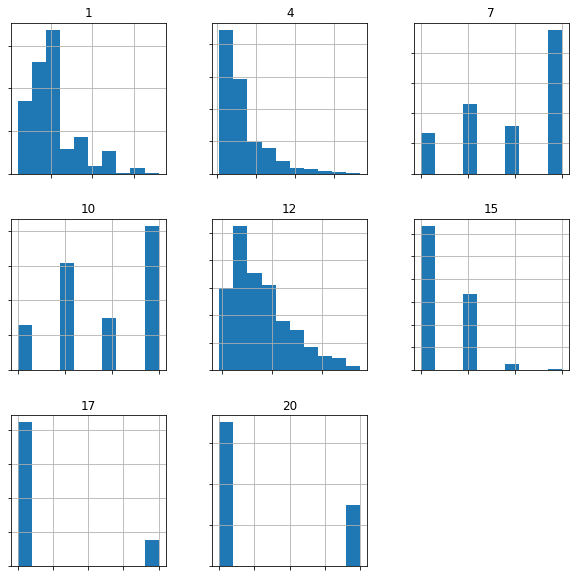

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 10, 10
ax = num_credit_df.hist()
for axis in ax.flatten():
	axis.set_xticklabels([])
	axis.set_yticklabels([])
pyplot.show()

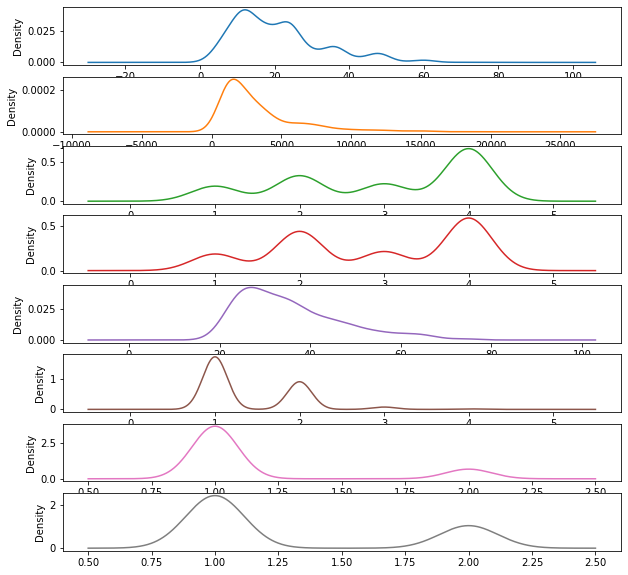

In [ ]:
credit_df.plot(kind='density', subplots=True, sharex=False, legend=False)
pyplot.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


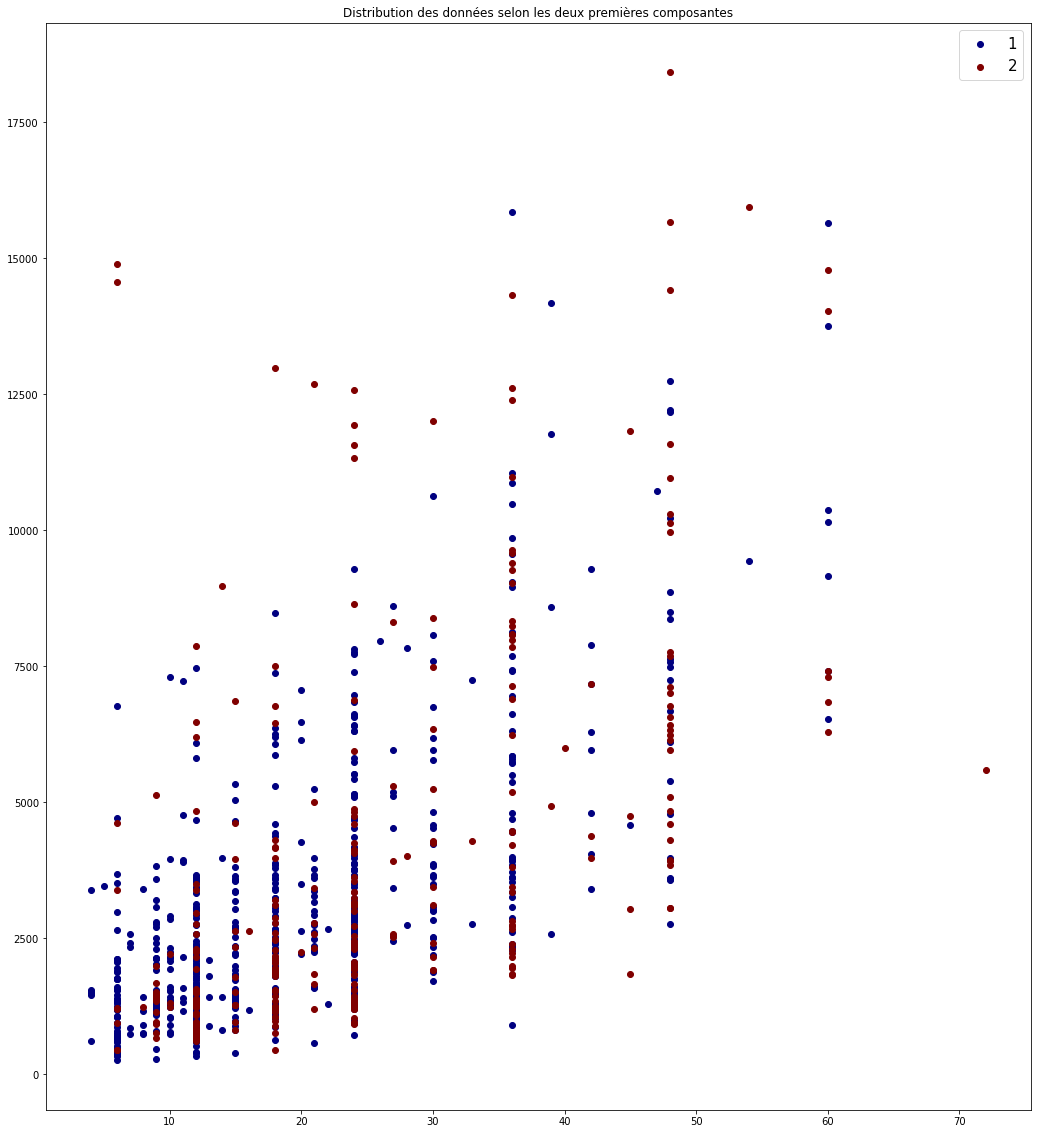

In [ ]:
y = num_credit_df[20]
X = num_credit_df.drop([20], axis='columns')
x1=X.iloc[:,0]
x2=X.iloc[:,1]
classes = y
unique = np.unique(classes)
colors = [plt.cm.jet(i/float(len(unique)-1)) for i in range(len(unique))]
fig1=plt.figure(figsize=(60,20))
ax1 = fig1.add_subplot(131)
for i, u in enumerate(unique):
    xi = [x1[j] for j  in range(len(x1)) if classes[j] == u]
    yi = [x2[j] for j  in range(len(x2)) if classes[j] == u]  
    ax1.scatter(xi, yi, c=colors[i], label=str(u))
plt.legend(fontsize=15)
plt.title("Distribution des données selon les deux premières composantes")
plt.show()


## ***Traitement des données***

Nous divisons les données en entrées et en sorties.Ensuite nous appliquons l'encodage one-hot sur toutes les variables d'entrée qui sont catégoriques.

In [ ]:
last_ix = len(credit_df.columns) - 1
X, y = credit_df.drop(last_ix, axis=1), credit_df[last_ix]
ct_credit_df = X.select_dtypes(include=['object', 'bool']).columns
ct_data = ColumnTransformer([('o',OneHotEncoder(),ct_credit_df)], remainder='passthrough')
X_transformer = ct_data.fit_transform(X)
X_transformer

array([[ 1.,  0.,  0., ..., 67.,  2.,  1.],
       [ 0.,  1.,  0., ..., 22.,  1.,  1.],
       [ 0.,  0.,  0., ..., 49.,  1.,  2.],
       ...,
       [ 0.,  0.,  0., ..., 38.,  1.,  1.],
       [ 1.,  0.,  0., ..., 23.,  1.,  1.],
       [ 0.,  1.,  0., ..., 27.,  1.,  1.]])

In [ ]:
# Encodage de la variable de la sortie en classe 0 et 1
y = LabelEncoder().fit_transform(y)
y[:10]

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1])



## ***Evaluate Algorithms***




In [ ]:
def f2(y_true, y_pred):
	return fbeta_score(y_true, y_pred, beta=2)

In [ ]:
def get_models():
  models = []
  models.append(('LR', LogisticRegression()))
  models.append(('LDA', LinearDiscriminantAnalysis()))
  models.append(('KNN', KNeighborsClassifier()))
  models.append(('CART', DecisionTreeClassifier()))
  models.append(('NB', GaussianNB()))
  models.append(('SVM', SVC()))
  return models

def evaluate_model(X, y, model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	metric = make_scorer(f2)
	scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
	return scores
models= get_models()

In [ ]:
results = list()
names = []
cat_ix = X.select_dtypes(include=['object', 'bool']).columns
num_ix = X.select_dtypes(include=['int64', 'float64']).columns
for name, algo in models:
  # one hot encode categorical, normalize numerical
  ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])
  # wrap the model i a pipeline
  pipeline = Pipeline(steps=[('t',ct),('m',algo)])
  # evaluate the model and store results
  scores = evaluate_model(X.values, y, pipeline)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>LR 0.498 (0.076)
>LDA 0.519 (0.072)
>KNN 0.407 (0.096)
>CART 0.442 (0.077)
>NB 0.639 (0.049)
>SVM 0.436 (0.077)


On remarque que le Bayesien Naïf donne le meilleur résultat.

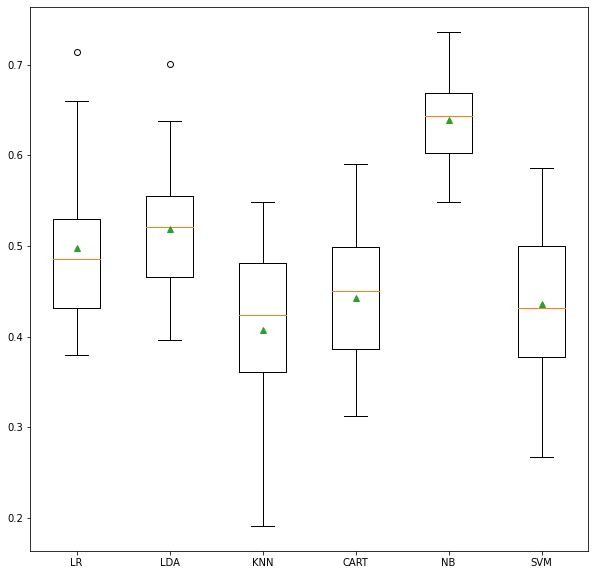

In [ ]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# ***Pubmed data***

### **Importations**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC
import scipy
from scipy.io import loadmat
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.over_sampling  import RandomOverSampler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')

### ***Matrice X***

#### **Analyse exploratoire des données**



##### ***Lecture des données***

In [ ]:
pubmed = scipy.io.loadmat('/content/pubmed.mat')

In [ ]:
pubmed

{'W': <19717x19717 sparse matrix of type '<class 'numpy.float64'>'
 	with 88651 stored elements in Compressed Sparse Column format>,
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Jan 30 19:12:21 2019',
 '__version__': '1.0',
 'fea': array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.10463634, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.01942665, 0.0079607 , ..., 0.        , 0.        ,
         0.        ],
        [0.10782092, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.02658384, 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 'gnd': array([[2],
        [2],
        [1],
        ...,
        [3],
        [1],
        [3]], dtype=uint8)}



##### ***Visualisation des données*** 

Text(0.5, 1.0, 'Visualisation du dataset')

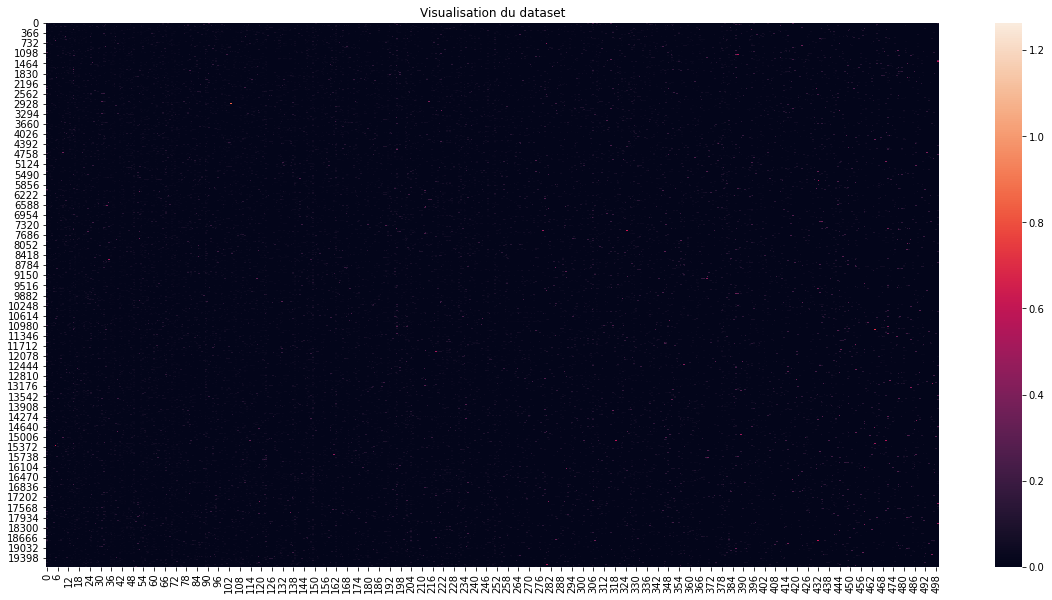

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(pubmed["fea"])
ax.set_title("Visualisation du dataset")

Text(0.5, 0, 'Label')

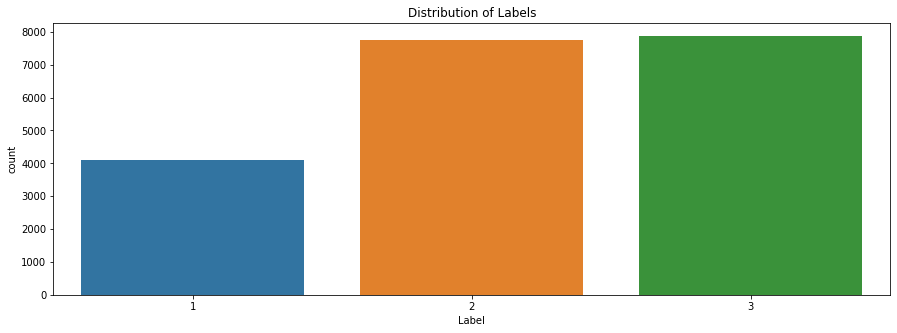

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x = pubmed["gnd"].flatten())
ax.set_title('Distribution of Labels')
ax.set_xlabel('Label')

Suite à la visualisation des données, on remarque que les classes sont déséquilibrées.La classe 1 est minoritaire. \\
Nous allons donc essayer d'équilibrer ces classes.

##### ***Over sampling data***

Équilibrage des données en utilisant ROS over−sampling tant qu'on a pas beaucoup de data.

In [ ]:
# Équilibrage des données en utilisant ROS over−sampling
ros = RandomOverSampler(sampling_strategy={1 : 7500})
X_resampled, y_resampled = ros.fit_sample(pubmed["fea"], pubmed["gnd"].flatten())

Text(0.5, 0, 'Label')

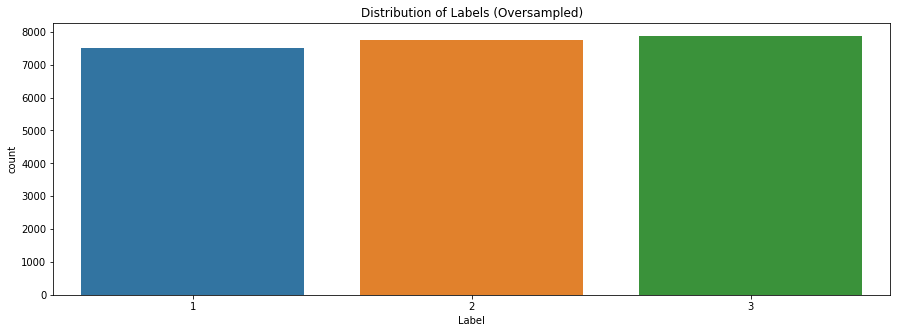

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x = y_resampled)
ax.set_title('Distribution of Labels (Oversampled)')
ax.set_xlabel('Label')

Nous remarquons qu'après l'application de la méthode ROS over−sampling, nous avons pu équilibrer la data.

#### ***Classification***

##### ***Données train/test sets***

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [ ]:
# Dictionnaire qui nous servira par la suite pour comparer les résultats
f1_scores = dict()
acc_scores = dict()

##### **Naive Bayes Classifier**

On a une distribution de données équivalente à celle d'une distribution Multinomiale, donc, on va utiliser la variante MultinomialNB de Naive Bayes.

In [ ]:
clf_nb = MultinomialNB()

In [ ]:
clf_nb.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
pred_nb = clf_nb.predict(X_test)

In [ ]:
confusion_matrix(Y_test, pred_nb)

array([[1333,   31,   91],
       [ 150, 1346,   88],
       [ 122,  379, 1083]])

In [ ]:
acc_nb = accuracy_score(Y_test, pred_nb)
print("Naive Bayes Accuracy :\n"+str(acc_nb))
print("Naive Bayes Precision :\n"+str(precision_score(Y_test, pred_nb, average="macro")))
print("Naive Bayes Recall :\n"+str(recall_score(Y_test, pred_nb, average="macro")))
f1_nb = f1_score(Y_test, pred_nb, average="macro")
print("Naive Bayes F1-Score :\n"+str(f1_nb))
f1_scores["Multinomial Naive Bayes Classifier sur X"] = f1_nb
acc_scores["Multinomial Naive Bayes Classifier sur X"] = acc_nb

Naive Bayes Accuracy :
0.8137573004542504
Naive Bayes Precision :
0.8184020165237348
Naive Bayes Recall :
0.8165369329029123
Naive Bayes F1-Score :
0.8127660066214193


##### ***Random Forests***

Nous allons utiliser la méthodes de grid search pour trouver les paramètres du modèles

In [ ]:
#Recherche des paramètres par grid search
def rf_grid_search(X, y):
    feature_mode = ['sqrt', 'log2']
    param_grid_search = {'max_features': feature_mode}

    grid_search = GridSearchCV(RandomForestClassifier(n_jobs=-1), param_grid_search, scoring='f1_macro', return_train_score=True)
    grid_search.fit(X, y)

    return grid_search.best_params_

In [ ]:
rnd_fr_clf = RandomForestClassifier(max_features = 'sqrt', n_jobs=-1)
rnd_fr_clf.fit(X_train, Y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
rnd_fr_predicted = rnd_fr_clf.predict(X_test)

In [ ]:
acc_rf = accuracy_score(Y_test, rnd_fr_predicted)
print("Random Forests Accuracy :\n"+str(acc_rf))
print("Random Forests Precision :\n"+str(precision_score(Y_test, rnd_fr_predicted, average="macro")))
print("Random Forests Recall :\n"+str(recall_score(Y_test, rnd_fr_predicted, average="macro")))
f1_rf = f1_score(Y_test, rnd_fr_predicted, average="macro")
print("Random Forests F1-Score :\n"+str(f1_rf))
f1_scores["Random Forests sur X"] = f1_rf
acc_scores["Random Forests sur X"] = acc_rf

Random Forests Accuracy :
0.9102314514384598
Random Forests Precision :
0.9106880033016784
Random Forests Recall :
0.9117354819674407
Random Forests F1-Score :
0.9105803054817301


##### ***Quadratic Discriminant Analysis***

In [ ]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, Y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
y_predicted_qda = clf.predict(X_test)

In [ ]:
acc_qda = accuracy_score(Y_test, y_predicted_qda)
print("QDA Accuracy :\n"+str(acc_qda))
print("QDA Precision :\n"+str(precision_score(Y_test, y_predicted_qda, average="macro")))
print("QDA Recall :\n"+str(recall_score(Y_test, y_predicted_qda, average="macro")))
f1_qda = f1_score(Y_test, y_predicted_qda, average="macro")
print("QDA F1-Score :\n"+str(f1_qda))
f1_scores["Quadratic Discriminant Analysis sur X"] = f1_qda
acc_scores["Quadratic Discriminant Analysis sur X"] = acc_qda

QDA Accuracy :
0.8066190785204412
QDA Precision :
0.8116544027221996
QDA Recall :
0.8101708667430317
QDA F1-Score :
0.8039279951608472


##### ***Linear Discriminant Analysis***

In [ ]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
y_predicted_lda = clf.predict(X_test)

In [ ]:
acc_lda = accuracy_score(Y_test, y_predicted_lda)
print("LDA Accuracy :\n"+str(acc_lda))
print("LDA Precision :\n"+str(precision_score(Y_test, y_predicted_lda, average="macro")))
print("LDA Recall :\n"+str(recall_score(Y_test, y_predicted_lda, average="macro")))
f1_lda = f1_score(Y_test, y_predicted_lda, average="macro")
print("LDA F1-Score :\n"+str(f1_lda))
f1_scores["Linear Discriminant Analysis sur X"] = f1_lda
acc_scores["Linear Discriminant Analysis sur X"] = acc_lda

LDA Accuracy :
0.8680510491023146
LDA Precision :
0.8684090122092418
LDA Recall :
0.8694314276788503
LDA F1-Score :
0.8683557010897127


## ***Combinaison des informations W et X***

In [ ]:
D_1 = scipy.sparse.csc_matrix(np.diag(1/np.squeeze(np.asarray(pubmed["W"].sum(axis=1)))))

In [ ]:
M = (D_1 * pubmed["W"] )* pubmed["fea"]

#### **Analyse exploratoire des données**





##### ***Visualisation des données*** 

Text(0.5, 1.0, 'Visualisation du dataset')

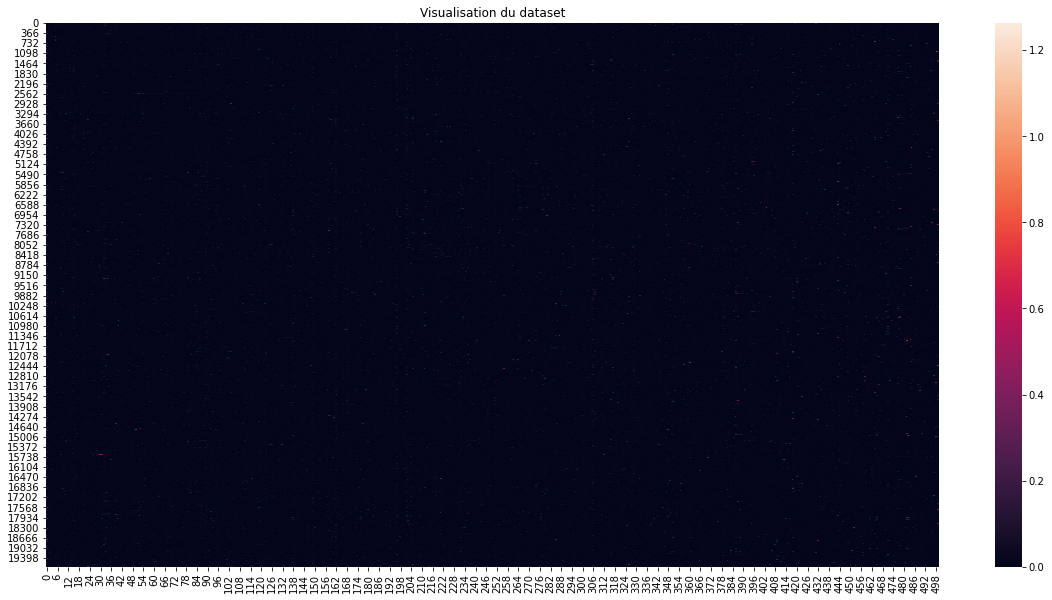

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(M)
ax.set_title("Visualisation du dataset")

Distribution des valeurs du dataset

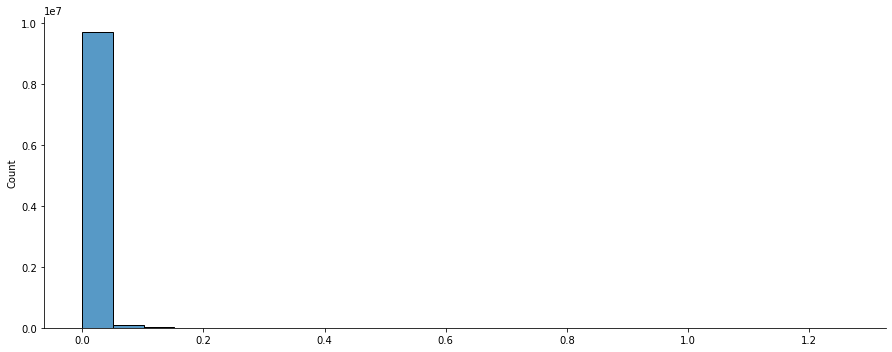

In [ ]:
sns.displot(M.flatten(), aspect=2.5)

##### ***Over sampling data***

In [ ]:
# Équilibrage des données en utilisant ROS over−sampling
ros = RandomOverSampler(sampling_strategy={1 : 7500})
X_resampled, y_resampled = ros.fit_sample(M, pubmed["gnd"].flatten())

Text(0.5, 0, 'Label')

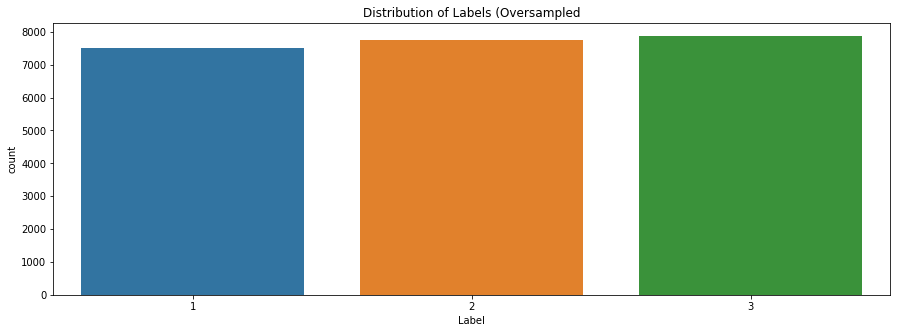

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x = y_resampled)
ax.set_title('Distribution of Labels (Oversampled')
ax.set_xlabel('Label')

#### ***Classification***

##### ***Données train/test sets***

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(M, pubmed["gnd"].flatten(), test_size=0.2)

##### **Naive Bayes Classifier**

On a une distribution de données équivalente à celle d'une distribution Multinomiale, donc, on va utiliser la variante MultinomialNB de Naive Bayes.

In [ ]:
clf_nb = MultinomialNB()

In [ ]:
clf_nb.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
pred_nb = clf_nb.predict(X_test)

In [ ]:
confusion_matrix(Y_test, pred_nb)

array([[ 477,  142,  208],
       [  76, 1377,  136],
       [  47,  384, 1097]])

In [ ]:
acc_nb = accuracy_score(Y_test, pred_nb)
print("Naive Bayes Accuracy :\n"+str(acc_nb))
print("Naive Bayes Precision :\n"+str(precision_score(Y_test, pred_nb, average="macro")))
print("Naive Bayes Recall :\n"+str(recall_score(Y_test, pred_nb, average="macro")))
f1_nb = f1_score(Y_test, pred_nb, average="macro")
print("Naive Bayes F1-Score :\n"+str(f1_nb))
f1_scores["Multinomial Naive Bayes Classifier sur M"] = f1_nb
acc_scores["Multinomial Naive Bayes Classifier sur M"] = acc_nb

Naive Bayes Accuracy :
0.7482251521298174
Naive Bayes Precision :
0.7599570719327592
Naive Bayes Recall :
0.7204327495471702
Naive Bayes F1-Score :
0.7320548442305772


##### ***Random Forests***

In [ ]:
#print(rf_grid_search(X_train, Y_train))

# Best parameters : max_features = 'sqrt'

In [ ]:
rnd_fr_clf = RandomForestClassifier(max_features = 'sqrt', n_jobs=-1)
rnd_fr_clf.fit(X_train, Y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
rnd_fr_predicted = rnd_fr_clf.predict(X_test)

In [ ]:
acc_rf = accuracy_score(Y_test, rnd_fr_predicted)
print("Random Forests Accuracy :\n"+str(acc_rf))
print("Random Forests Precision :\n"+str(precision_score(Y_test, rnd_fr_predicted, average="macro")))
print("Random Forests Recall :\n"+str(recall_score(Y_test, rnd_fr_predicted, average="macro")))
f1_rf = f1_score(Y_test, rnd_fr_predicted, average="macro")
print("Random Forests F1-Score :\n"+str(f1_rf))
f1_scores["Random Forests sur M"] = f1_rf
acc_scores["Random Forests sur M"] = acc_rf

Random Forests Accuracy :
0.8258113590263692
Random Forests Precision :
0.8176121193265441
Random Forests Recall :
0.8143605411718884
Random Forests F1-Score :
0.8159006545401937


##### ***Quadratic Discriminant Analysis***

In [ ]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, Y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
#Prediction du test set
y_predicted_qda = clf.predict(X_test)

In [ ]:
acc_qda = accuracy_score(Y_test, y_predicted_qda)
print("QDA Accuracy :\n"+str(acc_qda))
print("QDA Precision :\n"+str(precision_score(Y_test, y_predicted_qda, average="macro")))
print("QDA Recall :\n"+str(recall_score(Y_test, y_predicted_qda, average="macro")))
f1_qda = f1_score(Y_test, y_predicted_qda, average="macro")
print("QDA F1-Score :\n"+str(f1_qda))
f1_scores["Quadratic Discriminant Analysis sur M"] = f1_qda
acc_scores["Quadratic Discriminant Analysis sur M"] = acc_qda

QDA Accuracy :
0.7857505070993914
QDA Precision :
0.7768312161720132
QDA Recall :
0.7989871141426476
QDA F1-Score :
0.7787191358993703


##### ***Linear Discriminant Analysis***

In [ ]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
#Prediction du test set
y_predicted_lda = clf.predict(X_test)

In [ ]:
acc_lda = accuracy_score(Y_test, y_predicted_lda)
print("LDA Accuracy :\n"+str(acc_lda))
print("LDA Precision :\n"+str(precision_score(Y_test, y_predicted_lda, average="macro")))
print("LDA Recall :\n"+str(recall_score(Y_test, y_predicted_lda, average="macro")))
f1_lda = f1_score(Y_test, y_predicted_lda, average="macro")
print("LDA F1-Score :\n"+str(f1_lda))
f1_scores["Linear Discriminant Analysis sur M"] = f1_lda
acc_scores["Linear Discriminant Analysis sur M"] = acc_lda

LDA Accuracy :
0.8237829614604463
LDA Precision :
0.8146257705184768
LDA Recall :
0.8171956244225062
LDA F1-Score :
0.8158119065503385


### **Comparaison des différents modèles**

Nous allons faire une comparaison des differentes techniques que nous avons appliquées à l’aide des mesures telles que (Accuracy, NMI et la F-measure ).

In [ ]:
df = pd.DataFrame({"Methodes" : f1_scores.keys(), "Accuracy" : acc_scores.values(), "F1_score" : f1_scores.values()}, columns = ["Methodes", 'Accuracy', 'F1_score'])

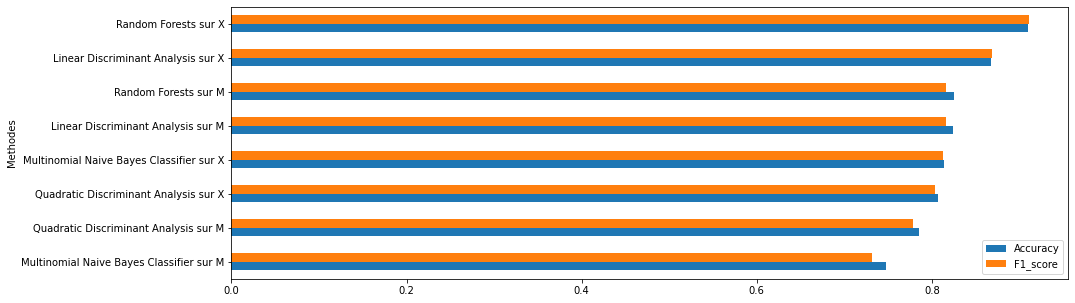

In [ ]:
df.set_index("Methodes").sort_values("F1_score").plot(kind='barh', legend=True, figsize=(15,5))

Le meilleur modèle est donc : 

En utilisant X ==> **Random Forests**

En utilisant M ==> **Random Forests / Linear Discriminant Analysis**

# ***Cora data***

### **Importations**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ln -s "/content/drive/My Drive/" mydrive

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC
from scipy.io import loadmat
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.over_sampling  import RandomOverSampler
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


### **Analyse exploratoire des données**



#### ***Lecture des données***

In [ ]:
cora_mat = loadmat('/content/mydrive/app_supp/Donnees_relationnelles/cora.mat')

In [ ]:
cora_mat

{'W': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 1, 0]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Jan 18 15:36:27 2019',
 '__version__': '1.0',
 'fea': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'gnd': array([[4],
        [5],
        [5],
        ...,
        [4],
        [4],
        [4]], dtype=uint8)}

In [ ]:
X, W, L = cora_mat['fea'], cora_mat['W'], cora_mat['gnd']

In [ ]:
#Pas de NaN Values
np.isnan(X).any()

False



### ***Visualisation des données*** 

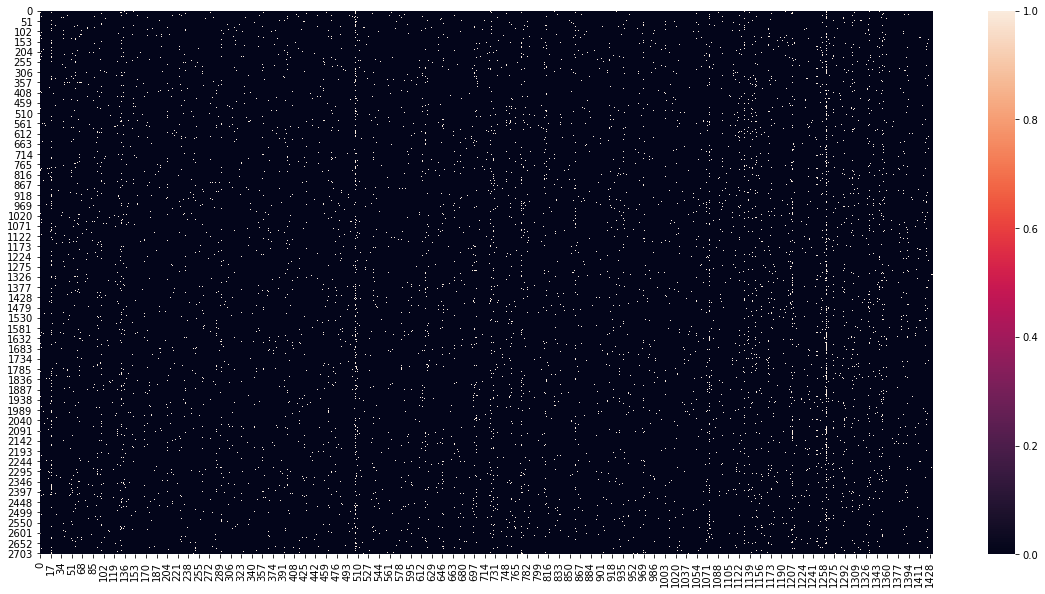

In [ ]:
#Heat map
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(X)

In [ ]:
#Les valeurs des données => Données binaires
set(W.flatten())

{0, 1}

Text(0.5, 0, 'Label')

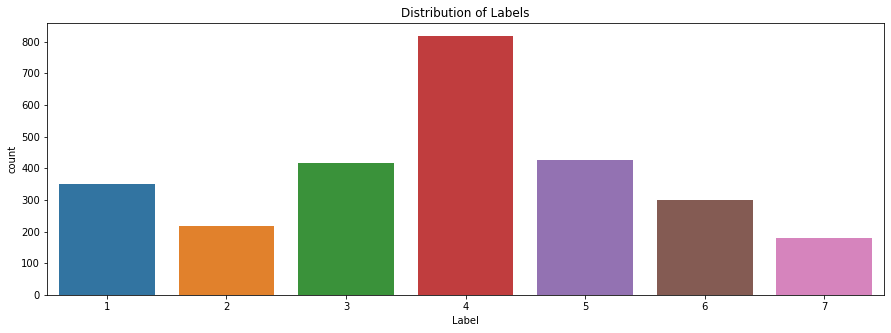

In [ ]:
#Distribution des labels
#Distribution déséquilibrée 
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x = L.flatten())
ax.set_title('Distribution of Labels')
ax.set_xlabel('Label')

Suite à la visualisation des données, on remarque que les classes sont déséquilibrées.La classe 4 est majoritaire. \\
Nous allons donc essayer d'équilibrer ces classes.

#### ***Undersampling/Over sampling data***

Nous allons faire un sous-échantillonnage de la classe 4.

In [ ]:
ncl = NeighbourhoodCleaningRule(return_indices=False, sampling_strategy={4 : 600})
X_resampled, y_resampled = ncl.fit_sample(X, L)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=F

Text(0.5, 0, 'Label')

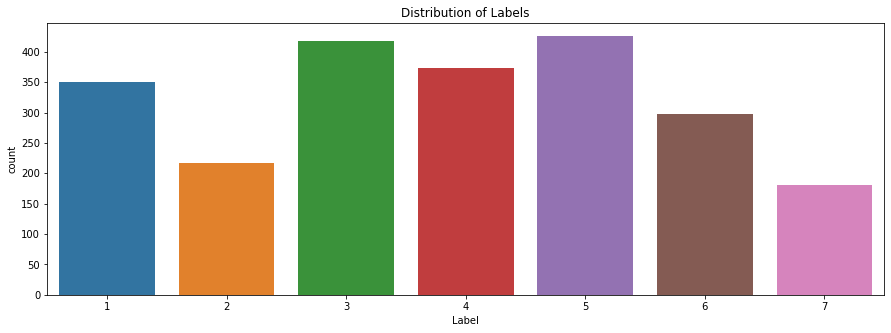

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x = y_resampled.flatten())
ax.set_title('Distribution of Labels')
ax.set_xlabel('Label')

Équilibrage des données en utilisant ROS over−sampling tant qu'on a pas beaucoup de data.

In [ ]:
ros = RandomOverSampler(sampling_strategy={1 : 400, 2 : 400, 7 : 400, 6 : 400})
X_resampled, y_resampled = ros.fit_sample(X_resampled, y_resampled)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 0, 'Label')

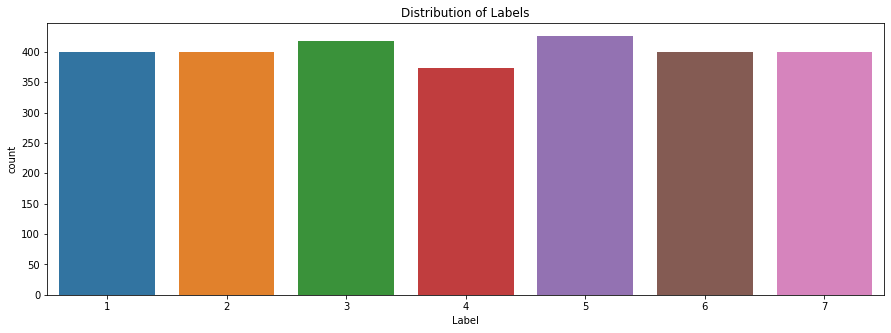

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x = y_resampled.flatten())
ax.set_title('Distribution of Labels')
ax.set_xlabel('Label')

Nous remarquons qu'après l'application de la méthode ROS over−sampling et aussi le Undersampling de la classe 4, nous avons pu équilibrer la data.

## ***Classification***

### ***Séparation des données train/test sets***

In [ ]:
def split_train_test(data, y_label, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data[train_indices], data[test_indices], y_label[train_indices], y_label[test_indices]

In [ ]:
#Split data into train /test sets
train_set, test_set, y_train, y_test = split_train_test(X_resampled, y_resampled, 0.2)

In [ ]:
f1_scores = dict()

### **1. Naive Bayes Classifier**

#####    Training

On a une distribution de données équivalente à celle d'une distribution de Bernouilli, donc, on va utiliser la variante BernouilliNB de Naive Bayes.

In [ ]:
clf_nb = BernoulliNB()
clf_nb.fit(train_set, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

#####   Prédiction des données

In [ ]:
y_nb_predicted = clf_nb.predict(test_set)

#####   Évaluation du modèle

In [ ]:
#Matrice de confusion
conf_mx = confusion_matrix(y_test, y_nb_predicted)
print(conf_mx)

[[65  2  1  2  2  3  3]
 [ 2 66  2  0  2  0  0]
 [ 2  5 79  2  1  0  1]
 [ 5  5  1 59  7  2  1]
 [ 4  3  2  2 80  3  2]
 [ 4  0  3  1  1 56  4]
 [ 4  3  0  1  0  5 65]]


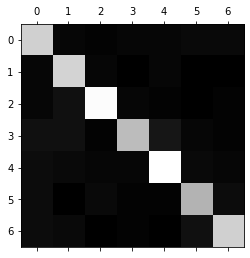

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
#Accuracy avec cross validation
cross_val_score(clf_nb, X_resampled, y_resampled, cv=4, scoring="accuracy")

array([0.80992908, 0.79971591, 0.83806818, 0.85227273])

In [ ]:
#Calcul de la precision et du rappel 
print(precision_score(y_test, y_nb_predicted, average='macro'))
print(recall_score(y_test, y_nb_predicted, average='macro'))
f1_nb = f1_score(y_test, y_nb_predicted, average='macro')
print(f1_nb)
f1_scores["NB Classifier sur X"] = f1_nb

0.8352749916302903
0.8347912353347136
0.8330727434959905


In [ ]:
normalized_mutual_info_score(y_test, y_nb_predicted)

0.6444266142644927

### **2. RF Classifier**


##### Training

In [ ]:
#Recherche des paramètres par grid search
def rf_grid_search(X, y):
    feature_mode = ['sqrt', 'log2']
    param_grid_search = {'max_features': feature_mode}

    grid_search = GridSearchCV(RandomForestClassifier(n_jobs=-1), param_grid_search, scoring='f1_macro', return_train_score=True)
    grid_search.fit(X, y)

    return grid_search.best_params_

In [ ]:
print(rf_grid_search(train_set, y_train))

{'max_features': 'log2'}


In [ ]:
rnd_fr_clf = RandomForestClassifier(max_features = 'log2', n_jobs=-1)
rnd_fr_clf.fit(train_set, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

##### Prédiction des données

In [ ]:
rnd_fr_predicted = rnd_fr_clf.predict(test_set)

##### Évaluation du modèle

In [ ]:
#Matrice de confusion
conf_mx = confusion_matrix(y_test, rnd_fr_predicted)
print(conf_mx)

[[64  2  1  4  4  1  2]
 [ 1 66  1  3  1  0  0]
 [ 5  3 80  0  1  1  0]
 [ 3  3  0 65  6  3  0]
 [ 3  0  2  2 81  7  1]
 [ 6  1  2  1  0 59  0]
 [ 4  1  0  1  0  1 71]]


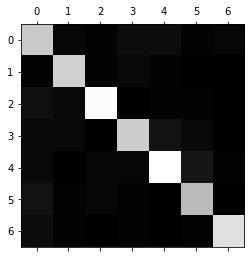

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
#Cross validation
print(cross_val_score(rnd_fr_clf, X, L, cv=3, scoring="accuracy"))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[0.73089701 0.79291251 0.74279379]


In [ ]:
#Precision, rappel et f1 score
f1_rf = f1_score(y_test, rnd_fr_predicted, average='macro')

print(precision_score(y_test, rnd_fr_predicted, average='macro'))
print(recall_score(y_test, rnd_fr_predicted, average='macro'))
print(f1_score(y_test, rnd_fr_predicted,average='macro'))

f1_scores["Random Forest sur X"] = f1_rf

0.863996351573838
0.863949607156129
0.8632909650395633


In [ ]:
normalized_mutual_info_score(y_test, rnd_fr_predicted)

0.704742156563739

### ***Modèle de scoring***

Nous allons utilisation des différentes techniques de classification sur M supervisée vue en cours pour créer un modèle de scoring.

In [ ]:
X, W, L = cora_mat['fea'], cora_mat['W'], cora_mat['gnd']

In [ ]:
D = np.diag(np.sum(W, axis = 1))

In [ ]:
M = np.dot(np.dot(np.linalg.inv(D), W), X)

#### Under/Over sampling data

In [ ]:
#Undersampling de la classe 4
ncl = NeighbourhoodCleaningRule(return_indices=False, sampling_strategy={4 : 600})
X_resampled, y_resampled = ncl.fit_sample(M, L)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=F

Text(0.5, 0, 'Label')

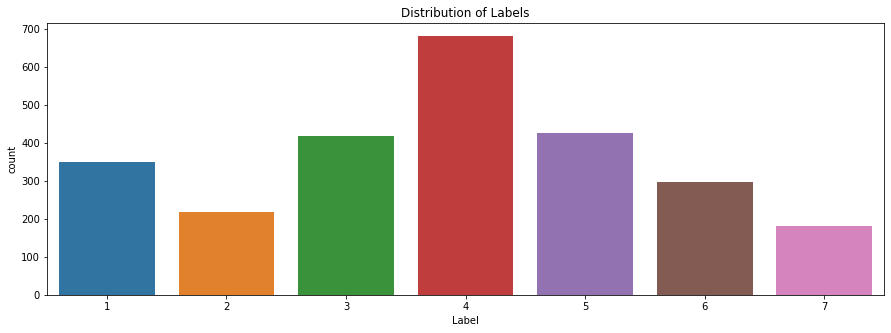

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x = y_resampled.flatten())
ax.set_title('Distribution of Labels')
ax.set_xlabel('Label')

In [ ]:
# Équilibrage des données en utilisant ROS over−sampling tant qu'on a pas bcp de data
ros = RandomOverSampler(sampling_strategy={1 : 400, 2 : 400, 7 : 400, 6 : 400})
X_resampled, y_resampled = ros.fit_sample(X_resampled, y_resampled)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 0, 'Label')

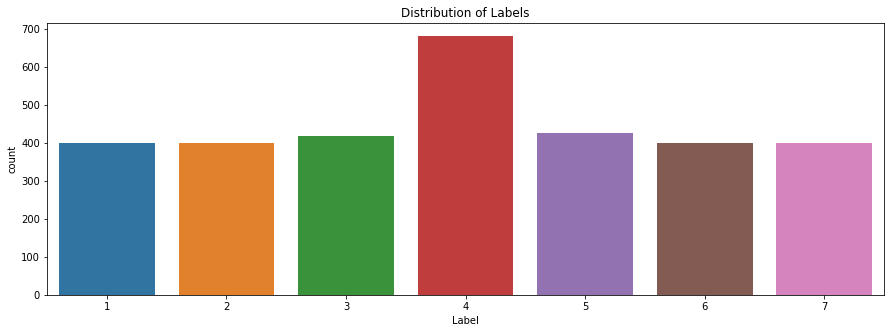

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x = y_resampled.flatten())
ax.set_title('Distribution of Labels')
ax.set_xlabel('Label')

####   Séparation des données train/test sets

In [ ]:
def split_train_test(data, y_label, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data[train_indices], data[test_indices], y_label[train_indices], y_label[test_indices]

In [ ]:
#Split data into train /test sets
train_set, test_set, y_train, y_test = split_train_test(M, L, 0.2)

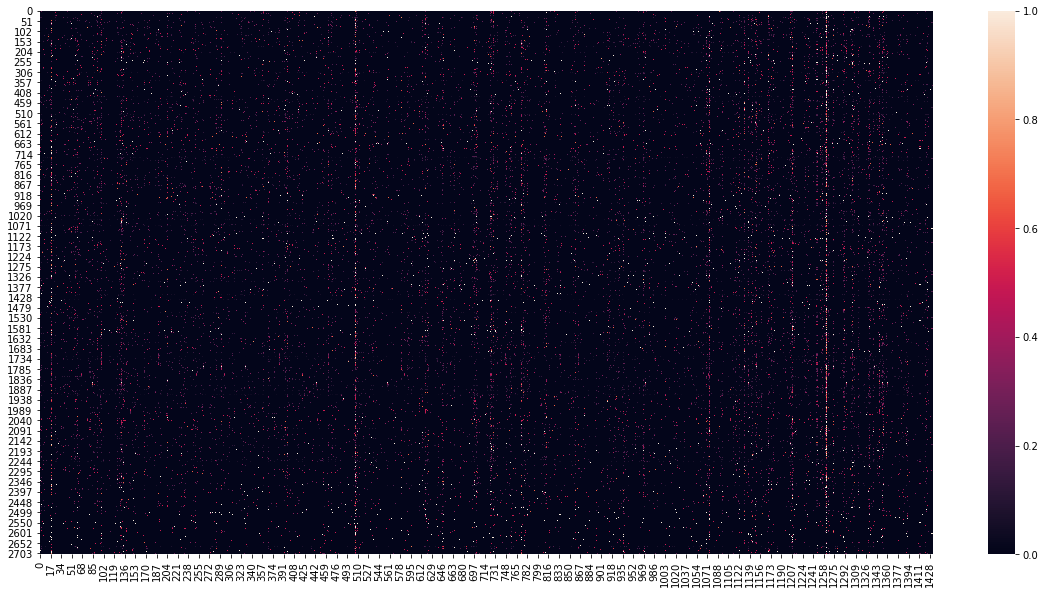

In [ ]:
# Visualiser le dataset dans sa totalité
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(M)

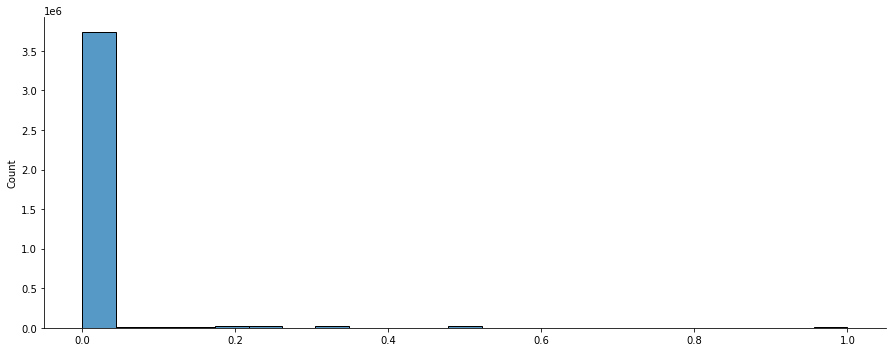

In [ ]:
# Visualiser la distribution des données du dataset
sns.displot(M.flatten(), aspect=2.5)

#### **1. Naive Bayes Classifier (Multinomial)**

#####    Training

In [ ]:
clf_mnb = MultinomialNB()
clf_mnb.fit(train_set, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#####  Prédiction des données

In [ ]:
y_mnb_predicted = clf_mnb.predict(test_set)

#####   Évaluation du modèle

In [ ]:
#Matrice de confusion
conf_mx = confusion_matrix(y_test, y_mnb_predicted)
print(conf_mx)

[[ 51   2   2   4   2   1   2]
 [  1  32   4   3   1   1   0]
 [  1   1  82   5   0   1   0]
 [ 12   3   5 140   5   2   0]
 [  5   0   0   7  67   3   0]
 [  3   1   0   0   0  56   0]
 [  3   0   1   1   0   4  27]]


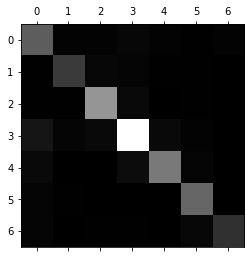

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
#Accuracy avec cross validation
cross_val_score(clf_mnb, M, L, cv=4, scoring="accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

array([0.83456425, 0.83456425, 0.85081241, 0.81093058])

In [ ]:
#Calcul de la precision et du rappel 
print(precision_score(y_test, y_mnb_predicted, average='macro'))
print(recall_score(y_test, y_mnb_predicted, average='macro'))
f1_mnb = f1_score(y_test, y_mnb_predicted, average='macro')
print(f1_mnb)
f1_scores["NB Classifier sur M"] = f1_mnb

0.8409718722114776
0.8298029614820467
0.8322201088314418


In [ ]:
normalized_mutual_info_score(y_test.reshape((y_test.shape[0])), y_mnb_predicted)

0.6522031088587515

#### **2. KNN Classifier**

En calculant M, on a prit en compte la notion de profil, il est donc possible d'utiliser un algorithme qui se base sur la distance euclidienne pour calculer la proximité entre les différents individus

#####    Training

In [ ]:
clf_knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
clf_knn.fit(train_set, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

#####   Prédiction des données

In [ ]:
y_knn_pred = clf_knn.predict(test_set)

#####   Évaluation du modèle

In [ ]:
#Matrice de confusion
conf_mx = confusion_matrix(y_test, y_knn_pred)
print(conf_mx)

[[ 50   2   2   7   1   1   1]
 [  0  34   6   2   0   0   0]
 [  1   2  80   6   0   1   0]
 [ 12   4   4 139   7   0   1]
 [  3   0   0  10  68   1   0]
 [  7   4   2   6   0  41   0]
 [  5   0   0   9   0   3  19]]


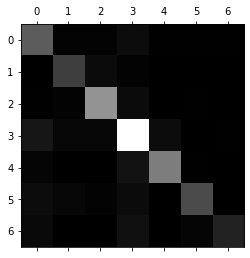

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
#Accuracy avec cross validation
cross_val_score(clf_knn, M, L, cv=4, scoring="accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

array([0.80354505, 0.79911374, 0.79172821, 0.80649926])

In [ ]:
#Calcul de la precision et du rappel 
print(precision_score(y_test, y_knn_pred, average='macro'))
print(recall_score(y_test, y_knn_pred, average='macro'))
f1_mnb = f1_score(y_test, y_knn_pred, average='macro')
print(f1_mnb)
f1_scores["KNN sur M"] = f1_mnb

0.8113707701205328
0.7646253473640077
0.7776810501211725


In [ ]:
normalized_mutual_info_score(y_test.reshape((541)), y_knn_pred)

0.5874657335267601

#### **3. RF Classifier**


##### Training

In [ ]:
#Recherche des paramètres par grid search
def rf_grid_search(X, y):
    feature_mode = ['sqrt', 'log2']
    param_grid_search = {'max_features': feature_mode}

    grid_search = GridSearchCV(RandomForestClassifier(n_jobs=-1), param_grid_search, scoring='f1_macro', return_train_score=True)
    grid_search.fit(X, y)

    return grid_search.best_params_

In [ ]:
print(rf_grid_search(train_set, y_train))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

{'max_features': 'sqrt'}


In [ ]:
rnd_fr_clf = RandomForestClassifier(max_features = 'sqrt', n_jobs=-1)
rnd_fr_clf.fit(train_set, y_train) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

##### Prédiction des données

In [ ]:
rnd_fr_predicted = rnd_fr_clf.predict(test_set)

##### Évaluation du modèle

In [ ]:
#Matrice de confusion
conf_mx = confusion_matrix(y_test, rnd_fr_predicted)
print(conf_mx)

[[ 46   1   3   8   2   3   1]
 [  0  32   5   3   1   1   0]
 [  1   0  80   8   0   1   0]
 [  6   0   7 151   2   0   1]
 [  2   0   0   7  67   6   0]
 [  3   0   0   7   0  48   2]
 [  2   0   1   3   0   0  30]]


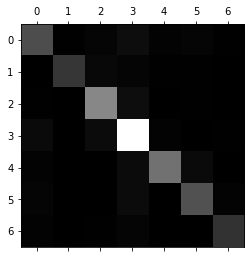

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
#Cross validation
print(cross_val_score(rnd_fr_clf, M, L, cv=3, scoring="accuracy"))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[0.80730897 0.84717608 0.82372506]


In [ ]:
#Precision, rappel et f1 score
f1_rf = f1_score(y_test, rnd_fr_predicted, average='macro')

print(precision_score(y_test, rnd_fr_predicted, average='macro'))
print(recall_score(y_test, rnd_fr_predicted, average='macro'))
print(f1_score(y_test, rnd_fr_predicted,average='macro'))

f1_scores["Random Forest sur M"] = f1_rf

0.8576644884969912
0.817734538803594
0.8346552331355523


In [ ]:
normalized_mutual_info_score(y_test.reshape((y_test.shape[0])), rnd_fr_predicted)

0.649844877317438

### **Comparaison des différents modèles**

([<matplotlib.axis.XTick at 0x7f96908e5890>,
 [Text(0, 0, 'NB Classifier sur X'),
  Text(0, 0, 'Random Forest sur X'),
  Text(0, 0, 'NB Classifier sur M'),
  Text(0, 0, 'KNN sur M'),
  Text(0, 0, 'Random Forest sur M')])

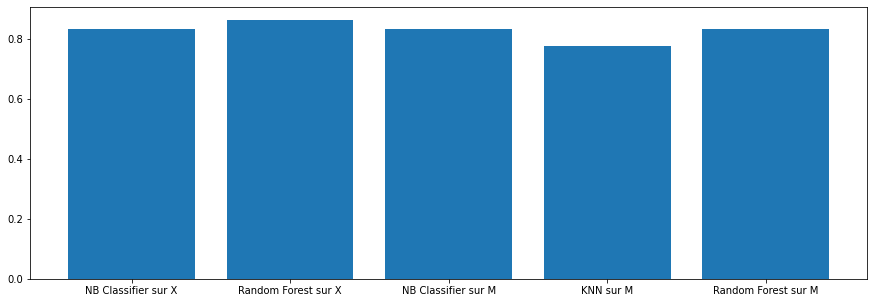

In [ ]:
# Afficher les Scores F1 pour chaque méthode
plt.figure(figsize=(15,5)) 
plt.bar(range(len(f1_scores)), list(f1_scores.values()), align='center')
plt.xticks(range(len(f1_scores)), list(f1_scores.keys()))

Le meilleur modèle est donc : 

En utilisant X ==> **Random Forest**

En utilisant M ==> **Naive Bayes**

# ***CiteSeer data***

## Importations

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling  import RandomOverSampler
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, plot_precision_recall_curve, average_precision_score, auc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical


Dans cette partie nous allons faire une analyse exploratoire des données CiteSeer puis nous allons faire le traitement de ces données. Ensuite nous allons comparer plusieurs algorithmes appliqués sur ces données.

## **Analyse exploratoire des données**

### ***Lecture des données***

In [ ]:
citeseer_mat = loadmat('/content/citeseer.mat')
citeseer_mat

{'W': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Jan 18 15:27:08 2019',
 '__version__': '1.0',
 'fea': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'gnd': array([[4],
        [2],
        [6],
        ...,
        [4],
        [2],
        [6]], dtype=uint8)}

In [ ]:
X, W, L = citeseer_mat['fea'], citeseer_mat['W'], citeseer_mat['gnd']

In [ ]:
np.isnan(X).any()

False

### Visualisation des données 

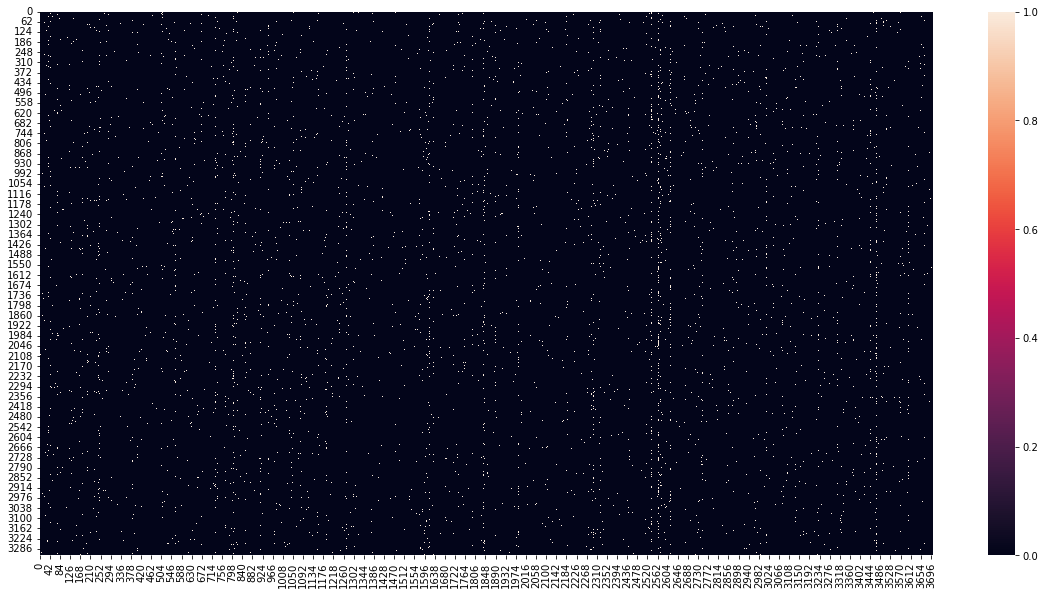

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(X)

In [ ]:
#Les valeurs des données => Données binaires
set(W.flatten())

{0, 1}

Text(0.5, 0, 'Label')

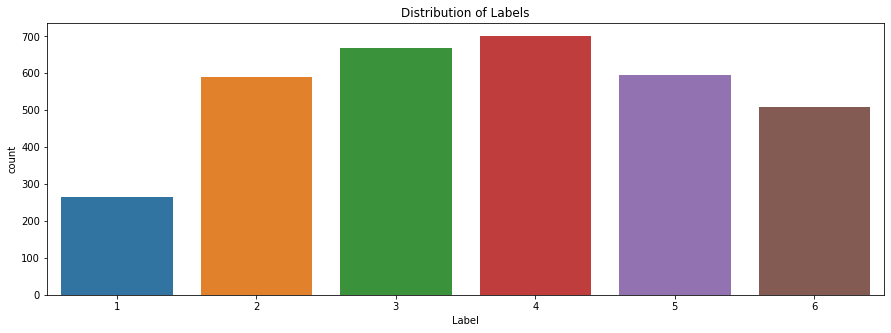

In [ ]:
#Distribution des labels
#Distribution déséquilibrée 
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x = L.flatten())
ax.set_title('Distribution of Labels')
ax.set_xlabel('Label')

Suite à la visualisation des données, on remarque que les classes sont déséquilibrées.La classe 1 est minoritaire. \\
Nous allons donc essayer d'équilibrer ces classes.

### ***Over sampling data***

Équilibrage des données en utilisant ROS over−sampling tant qu'on a pas beaucoup de data.

In [ ]:
ros = RandomOverSampler(sampling_strategy={1 : 500})
X_resampled, y_resampled = ros.fit_resample(X, L)

Text(0.5, 0, 'Label')

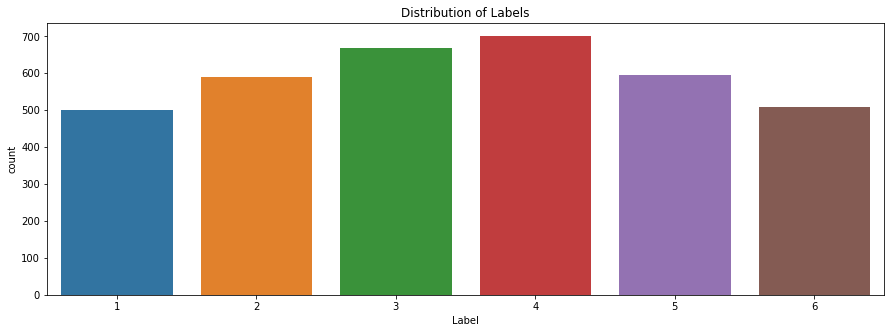

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(x = y_resampled.flatten())
ax.set_title('Distribution of Labels')
ax.set_xlabel('Label')

Nous remarquons qu'après l'application de la méthode ROS over−sampling, nous avons pu équilibrer la data.

## ***Classification***

Cette fonction permet d'évaluer différent algorithmes appliqués sur son input (data X, Y).

In [ ]:
def evaluate_aglo(X, y, nbr_classes):

  names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA", "Gradient Boosting", "Logistic Regression", "Extra Trees", "LDA"]
  h = .02
  classifiers = [
      KNeighborsClassifier(3),
      SVC(kernel="linear", C=0.025),
      SVC(gamma=2, C=1),
      GaussianProcessClassifier(1.0 * RBF(1.0)),
      DecisionTreeClassifier(max_depth=5),
      RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
      MLPClassifier(alpha=1, max_iter=1000),
      AdaBoostClassifier(),
      GaussianNB(),
      QuadraticDiscriminantAnalysis(),
      GradientBoostingClassifier(),
      LogisticRegression(),
      ExtraTreesClassifier(),
      LinearDiscriminantAnalysis()]

  # preprocess dataset, split into training and test part
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

  precision_clf = dict()
  recall_clf = dict()
  average_precision_clf = dict()
  auc_clf = dict()
  acc_clf = dict()

  # iterate over classifiers
  for name, clf in zip(names, classifiers):

      print('<-- {0:^50} -->'.format(name))

      clf.fit(X_train, y_train)
      score = clf.score(X_test, y_test)
      print("Accuracy achieved by {} ".format(name, 'G') + str(score))
      acc_clf[name] = score

      fpr, tpr, thresholds = roc_curve(y_test, clf.predict(X_test), pos_label=2)
      print("Area Under the Curve achieved by {} ".format(name, 'G') + str(auc(fpr, tpr)))
      auc_c = dict()
      auc_c['auc'] = auc(fpr, tpr)
      auc_c['fpr'] = fpr
      auc_c['tpr'] = tpr
      auc_clf[name] = auc_c
      
      # For each class
      precision = dict()
      recall = dict()
      average_precision = dict()
      for i in range(1, nbr_classes):
          precision[i], recall[i], _ = precision_recall_curve(to_categorical(y_test, num_classes=nbr_classes)[:, i] , to_categorical(clf.predict(X_test), num_classes=nbr_classes)[:, i])
          average_precision[i] = average_precision_score(to_categorical(y_test, num_classes=nbr_classes)[:, i] , to_categorical(clf.predict(X_test), num_classes=nbr_classes)[:, i])

      # A "micro-average": quantifying score on all classes jointly
      precision["micro"], recall["micro"], _ = precision_recall_curve(to_categorical(y_test, num_classes=nbr_classes)[:,1:].ravel() , to_categorical(clf.predict(X_test), num_classes=nbr_classes)[:,1:].ravel())
      average_precision["micro"] = average_precision_score(to_categorical(y_test, num_classes=nbr_classes)[:, i] , to_categorical(clf.predict(X_test), num_classes=nbr_classes)[:, i],
                                                          average="micro")
      print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))
      print("\n\n")

      precision_clf[name] = precision
      recall_clf[name] = recall
      average_precision_clf[name] = average_precision
  
  return precision_clf, auc_clf, recall_clf, names

### ***Matrice X***

In [ ]:
precision_clf, auc_clf, recall_clf, names = evaluate_aglo(X_resampled, y_resampled, 7)

<--                 Nearest Neighbors                  -->
Accuracy achieved by Nearest Neighbors 0.1618334892422825
Area Under the Curve achieved by Nearest Neighbors 0.5046486274191146
Average precision score, micro-averaged over all classes: 0.16



<--                     Linear SVM                     -->
Accuracy achieved by Linear SVM 0.7380729653882133
Area Under the Curve achieved by Linear SVM 0.24197578515418683
Average precision score, micro-averaged over all classes: 0.62



<--                      RBF SVM                       -->
Accuracy achieved by RBF SVM 0.27970065481758655
Area Under the Curve achieved by RBF SVM 0.5535320088300221
Average precision score, micro-averaged over all classes: 0.15



<--                  Gaussian Process                  -->
Accuracy achieved by Gaussian Process 0.6604303086997194
Area Under the Curve achieved by Gaussian Process 0.3347553460908192
Average precision score, micro-averaged over all classes: 0.60



<--                   

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy achieved by QDA 0.2600561272217025
Area Under the Curve achieved by QDA 0.5769986050731998
Average precision score, micro-averaged over all classes: 0.15



<--                 Gradient Boosting                  -->
Accuracy achieved by Gradient Boosting 0.725912067352666
Area Under the Curve achieved by Gradient Boosting 0.25145587020409266
Average precision score, micro-averaged over all classes: 0.59



<--                Logistic Regression                 -->
Accuracy achieved by Logistic Regression 0.744621141253508
Area Under the Curve achieved by Logistic Regression 0.26489389076233427
Average precision score, micro-averaged over all classes: 0.61



<--                    Extra Trees                     -->
Accuracy achieved by Extra Trees 0.774555659494855
Area Under the Curve achieved by Extra Trees 0.25394777827435366
Average precision score, micro-averaged over all classes: 0.64



<--                        LDA                         -->
Accuracy achieved by LDA

On remarque que le modèle avec l'accuracy la plus elevée est Extra Trees  avec un précision de 0.78 un avergage precision score 0.64 et un AUC de 0.26

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes')

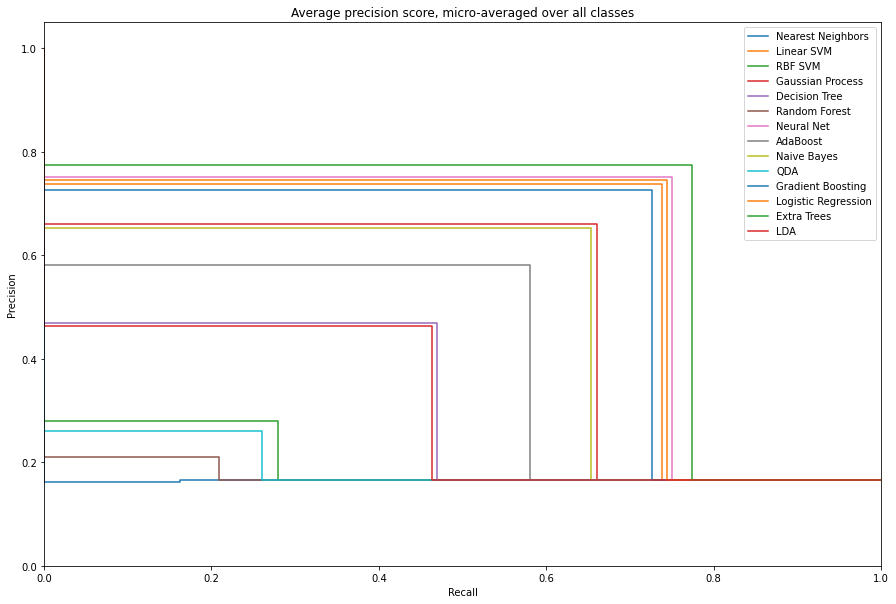

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
    plt.step(recall_clf[model]['micro'], precision_clf[model]['micro'], where='post', label=model)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Average precision score, micro-averaged over all classes')

Text(0.5, 1.0, 'ROC CURVE')

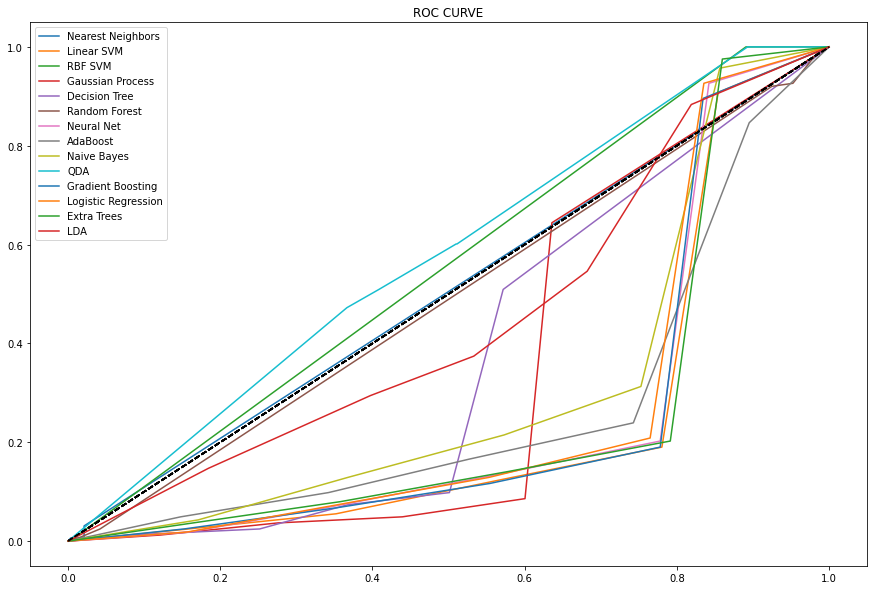

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
  plt.plot(auc_clf[model]['fpr'], auc_clf[model]['tpr'], label=model)
  plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.title('ROC CURVE')

### ***Matrice M***

In [ ]:
degrees = citeseer_mat['W'].sum(axis=0)
D = np.zeros((len(degrees), len(degrees)))
for i in range(len(degrees)):
  D[i, i] = 1/degrees[i]

In [ ]:
tmp = np.dot(citeseer_mat['W'], X)
M = np.dot(D, tmp)

In [ ]:
precision_clf, auc_clf, recall_clf, names = evaluate_aglo(X_resampled, y_resampled, 7)

<--                 Nearest Neighbors                  -->
Accuracy achieved by Nearest Neighbors 0.1618334892422825
Area Under the Curve achieved by Nearest Neighbors 0.5046486274191146
Average precision score, micro-averaged over all classes: 0.16



<--                     Linear SVM                     -->
Accuracy achieved by Linear SVM 0.7315247895229187
Area Under the Curve achieved by Linear SVM 0.2459912783217541
Average precision score, micro-averaged over all classes: 0.61



<--                      RBF SVM                       -->
Accuracy achieved by RBF SVM 0.2862488306828812
Area Under the Curve achieved by RBF SVM 0.5573951434878588
Average precision score, micro-averaged over all classes: 0.15



<--                  Gaussian Process                  -->
Accuracy achieved by Gaussian Process 0.64733395696913
Area Under the Curve achieved by Gaussian Process 0.33025230569211383
Average precision score, micro-averaged over all classes: 0.59



<--                   Dec

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy achieved by QDA 0.2666043030869972
Area Under the Curve achieved by QDA 0.5759050095478
Average precision score, micro-averaged over all classes: 0.15



<--                 Gradient Boosting                  -->
Accuracy achieved by Gradient Boosting 0.7231057062675398
Area Under the Curve achieved by Gradient Boosting 0.23377212584135754
Average precision score, micro-averaged over all classes: 0.59



<--                Logistic Regression                 -->
Accuracy achieved by Logistic Regression 0.7464920486435921
Area Under the Curve achieved by Logistic Regression 0.2627405571581414
Average precision score, micro-averaged over all classes: 0.61



<--                    Extra Trees                     -->
Accuracy achieved by Extra Trees 0.7680074836295603
Area Under the Curve achieved by Extra Trees 0.2549228727366297
Average precision score, micro-averaged over all classes: 0.65



<--                        LDA                         -->
Accuracy achieved by LDA 0

On remarque que le modèle avec l'accuracy la plus elevée est Extra Trees  avec un précision de 0.77 un avergage precision score 0.65 et un AUC de 0.25

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes')

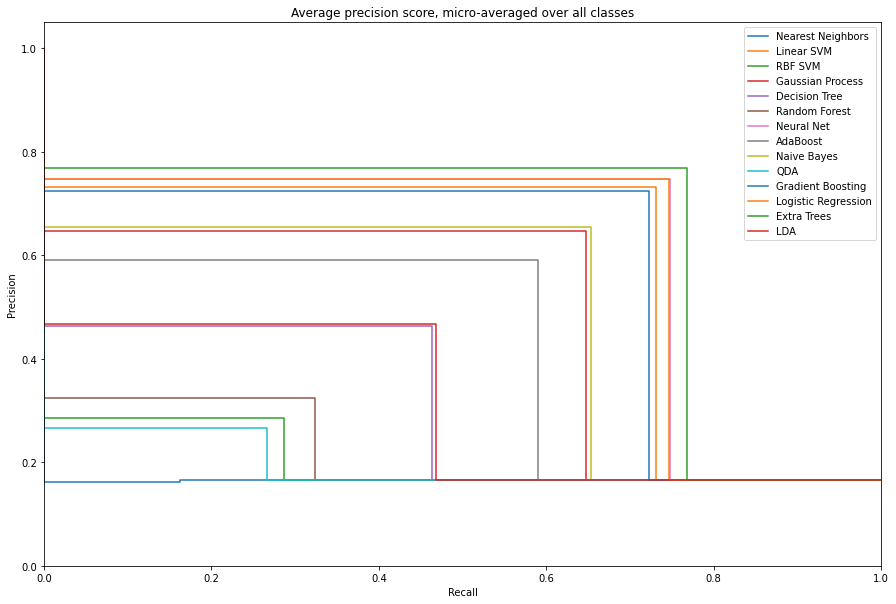

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
    plt.step(recall_clf[model]['micro'], precision_clf[model]['micro'], where='post', label=model)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Average precision score, micro-averaged over all classes')

Text(0.5, 1.0, 'ROC CURVE')

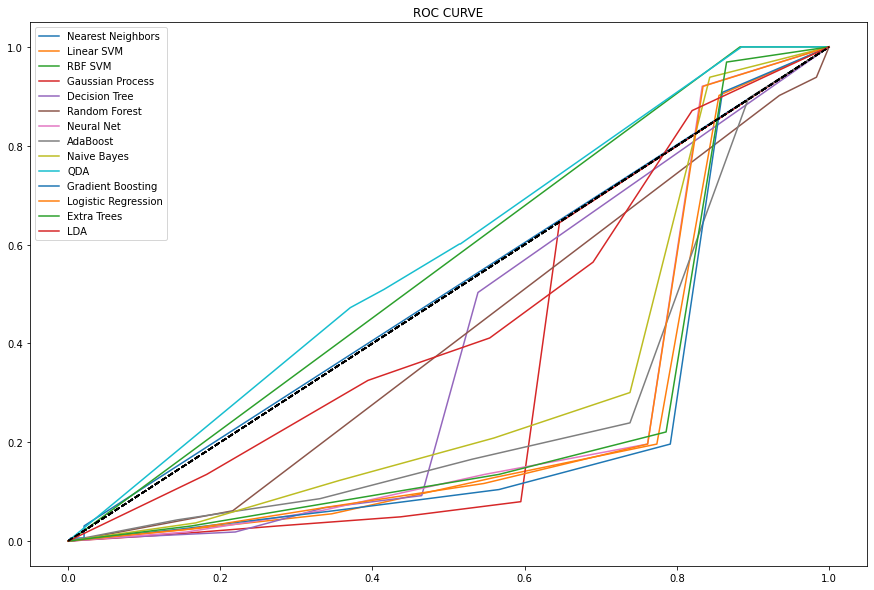

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
  plt.plot(auc_clf[model]['fpr'], auc_clf[model]['tpr'], label=model)
  plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.title('ROC CURVE')

### ***Matrice W +I***

In [ ]:
degrees = citeseer_mat['W'].sum(axis=0)
D = np.zeros((len(degrees), len(degrees)))
for i in range(len(degrees)):
  D[i, i] = 1/degrees[i]

In [ ]:
tmp = np.dot(citeseer_mat['W']+np.diag(np.ones(len(degrees))), X)
M = np.dot(D, tmp)

In [ ]:
precision_clf, auc_clf, recall_clf, names = evaluate_aglo(X_resampled, y_resampled, 7)

<--                 Nearest Neighbors                  -->
Accuracy achieved by Nearest Neighbors 0.1618334892422825
Area Under the Curve achieved by Nearest Neighbors 0.5046486274191146
Average precision score, micro-averaged over all classes: 0.16



<--                     Linear SVM                     -->
Accuracy achieved by Linear SVM 0.7436856875584659
Area Under the Curve achieved by Linear SVM 0.2510800525467572
Average precision score, micro-averaged over all classes: 0.62



<--                      RBF SVM                       -->
Accuracy achieved by RBF SVM 0.29279700654817586
Area Under the Curve achieved by RBF SVM 0.5612582781456954
Average precision score, micro-averaged over all classes: 0.15



<--                  Gaussian Process                  -->
Accuracy achieved by Gaussian Process 0.6623012160898035
Area Under the Curve achieved by Gaussian Process 0.33833746394181935
Average precision score, micro-averaged over all classes: 0.59



<--                   

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy achieved by QDA 0.2768942937324602
Area Under the Curve achieved by QDA 0.5692147780982949
Average precision score, micro-averaged over all classes: 0.16



<--                 Gradient Boosting                  -->
Accuracy achieved by Gradient Boosting 0.7277829747427502
Area Under the Curve achieved by Gradient Boosting 0.2521228619022468
Average precision score, micro-averaged over all classes: 0.60



<--                Logistic Regression                 -->
Accuracy achieved by Logistic Regression 0.7530402245088869
Area Under the Curve achieved by Logistic Regression 0.2639357250233616
Average precision score, micro-averaged over all classes: 0.61



<--                    Extra Trees                     -->
Accuracy achieved by Extra Trees 0.7895229186155285
Area Under the Curve achieved by Extra Trees 0.25116131041861345
Average precision score, micro-averaged over all classes: 0.66



<--                        LDA                         -->
Accuracy achieved by LD

On remarque que le modèle avec l'accuracy la plus elevée est Extra Trees  avec un précision de 0.79 un avergage precision score 0.66 et un AUC de 0.26.

L'accuracy de la matrice W+I avec Extra Trees est la plus elevée.

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes')

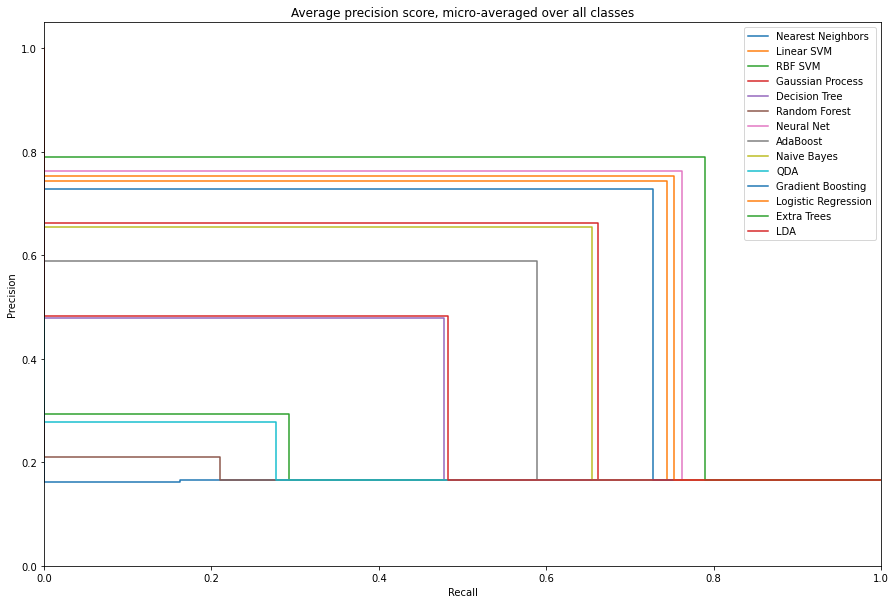

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
    plt.step(recall_clf[model]['micro'], precision_clf[model]['micro'], where='post', label=model)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
plt.legend()
plt.title('Average precision score, micro-averaged over all classes')

Text(0.5, 1.0, 'ROC CURVE')

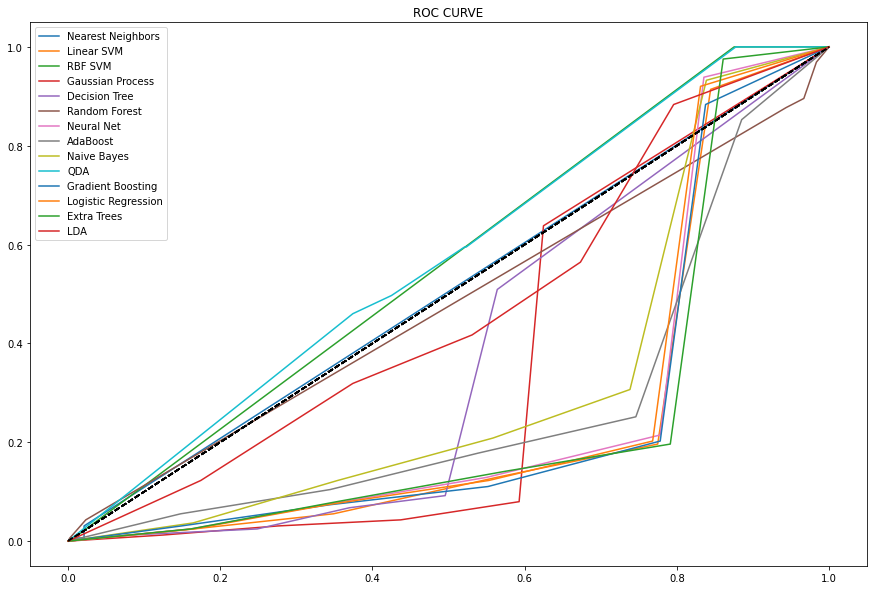

In [ ]:
plt.figure(figsize=(15,10))
for model in names:
  plt.plot(auc_clf[model]['fpr'], auc_clf[model]['tpr'], label=model)
  plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.title('ROC CURVE')